In [23]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("../Class")
sys.path.append("../utils")

import numpy as np
import matplotlib.pyplot as plt
from loss import MSELoss, LogSoftMaxCrossEntropy
from lineaire import Linear
#from mltools import gen_arti, plot_frontiere, plot_data
from transformations import TanH, SoftMax, ReLU 
from encapsulage import Sequential, Optim

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
def load_usps(fn):
    with open(fn, "r") as f:
        f.readline()
        data = [[float(x) for x in l.split()] for l in f if len(l.split()) > 2]
    tmp = np.array(data)
    return tmp[:, 1:], tmp[:, 0].astype(int)


def get_usps(l, datax, datay):
    if type(l) != list:
        resx = datax[datay == l, :]
        resy = datay[datay == l]
        return resx, resy
    tmp = list(zip(*[get_usps(i, datax, datay) for i in l]))
    tmpx, tmpy = np.vstack(tmp[0]), np.hstack(tmp[1])
    return tmpx, tmpy


def show_usps(data):
    plt.imshow(data.reshape((16, 16)), interpolation="nearest", cmap="gray")


uspsdatatrain = "../data/USPS_train.txt"
uspsdatatest = "../data/USPS_test.txt"

alltrainx, alltrainy = load_usps(uspsdatatrain)
alltestx, alltesty = load_usps(uspsdatatest)

label :  6


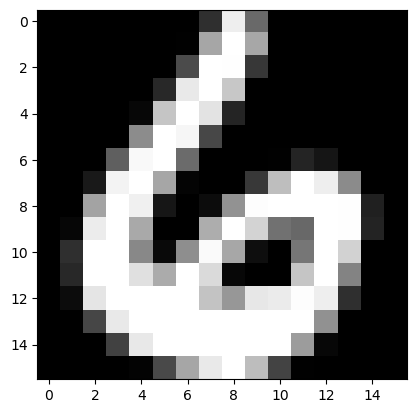

In [8]:
print("label : ", alltrainy[0])
show_usps(alltrainx[0])

100%|██████████| 100/100 [00:19<00:00,  5.22it/s]


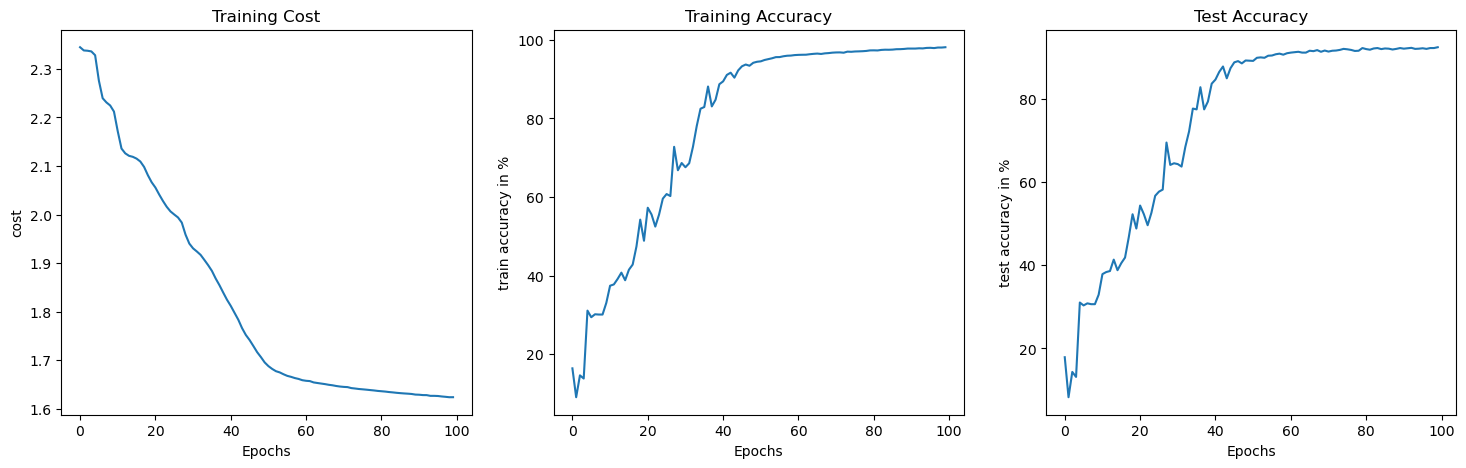

In [9]:
# Exemple d'utilisation avec le réseau à deux couches précédent
# Définition du réseau
# hidden_size = 50
dim = 1
input = alltestx.shape[1]

network = Sequential(
    Linear(input, 128),
    TanH(),
    Linear(128, 64),
    TanH(),
    Linear(64, 32),
    TanH(),
    Linear(32, 10),
)

# Définition de l'optimiseur
optimizer = Optim(network, LogSoftMaxCrossEntropy(), 1e-3)
optimizer.SGD(
    x_train=alltrainx,
    y_train=alltrainy,
    batch_size=128,
    epochs=100,
    x_test=alltestx,
    y_test=alltesty,
    plot=True,
)

In [10]:
print("accuracy train : ", optimizer.score(alltrainx, alltrainy))
print("accuracy test  ", optimizer.score(alltestx, alltesty))

accuracy train :  0.9814840213962419
accuracy test   0.924265072247135


  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [00:49<00:00,  2.03it/s]


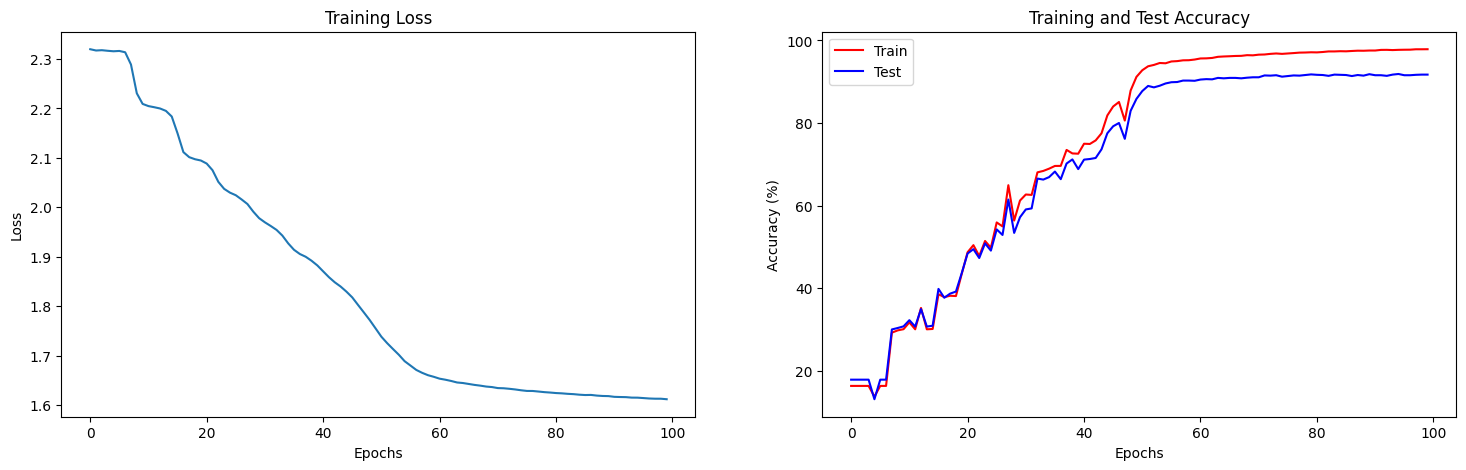

In [27]:
# Exemple d'utilisation avec le réseau à deux couches précédent
# Définition du réseau
# hidden_size = 50
dim = 1
input = alltestx.shape[1]

network = Sequential(
    Linear(input, 128),
    TanH(),
    Linear(128, 64),
    TanH(),
    Linear(64, 32),
    TanH(),
    Linear(32, 10),
)

# Définition de l'optimiseur
optimizer = Optim(network, LogSoftMaxCrossEntropy(), 1e-3)
optimizer.SGD(
    x_train=alltrainx,
    y_train=alltrainy,
    batch_size=64,
    epochs=100,
    x_test=alltestx,
    y_test=alltesty,
    plot=True,
)

In [28]:
print("accuracy train : ", optimizer.score(alltrainx, alltrainy))
print("accuracy test  ", optimizer.score(alltestx, alltesty))

accuracy train :  0.9787409134549444
accuracy test   0.9172894867962132
